In [1]:
import pandas as pd
df = pd.read_parquet("results.parquet")
df.set_index("timestamp", inplace=True)
df

,upload,download
timestamp,,
2025-02-27 07:00:09.896086,57.813602,16.902799
2025-02-27 07:01:10.395603,55.595779,16.962646
2025-02-27 07:02:06.803947,52.145377,37.853233
2025-02-27 07:03:10.230709,54.332221,17.297202
2025-02-27 07:04:08.239256,52.563435,23.148183
...,...,...
2025-02-28 11:15:10.825335,51.454509,15.983509
2025-02-28 11:20:07.654419,54.935565,31.165363
2025-02-28 11:25:10.211108,57.126381,16.658139


In [2]:
df.describe()

,upload,download
count,1668.000000,1668.000000
mean,50.281345,20.331473
std,9.543596,11.048357
min,13.614443,2.706088
25%,46.494323,14.916066
50%,54.098898,16.314755
75%,56.992569,21.187788
max,60.811048,55.702550


Text(2025-02-27 07:00:09.896086, 26.314754556293636, 'median: 16.31 MB/s')

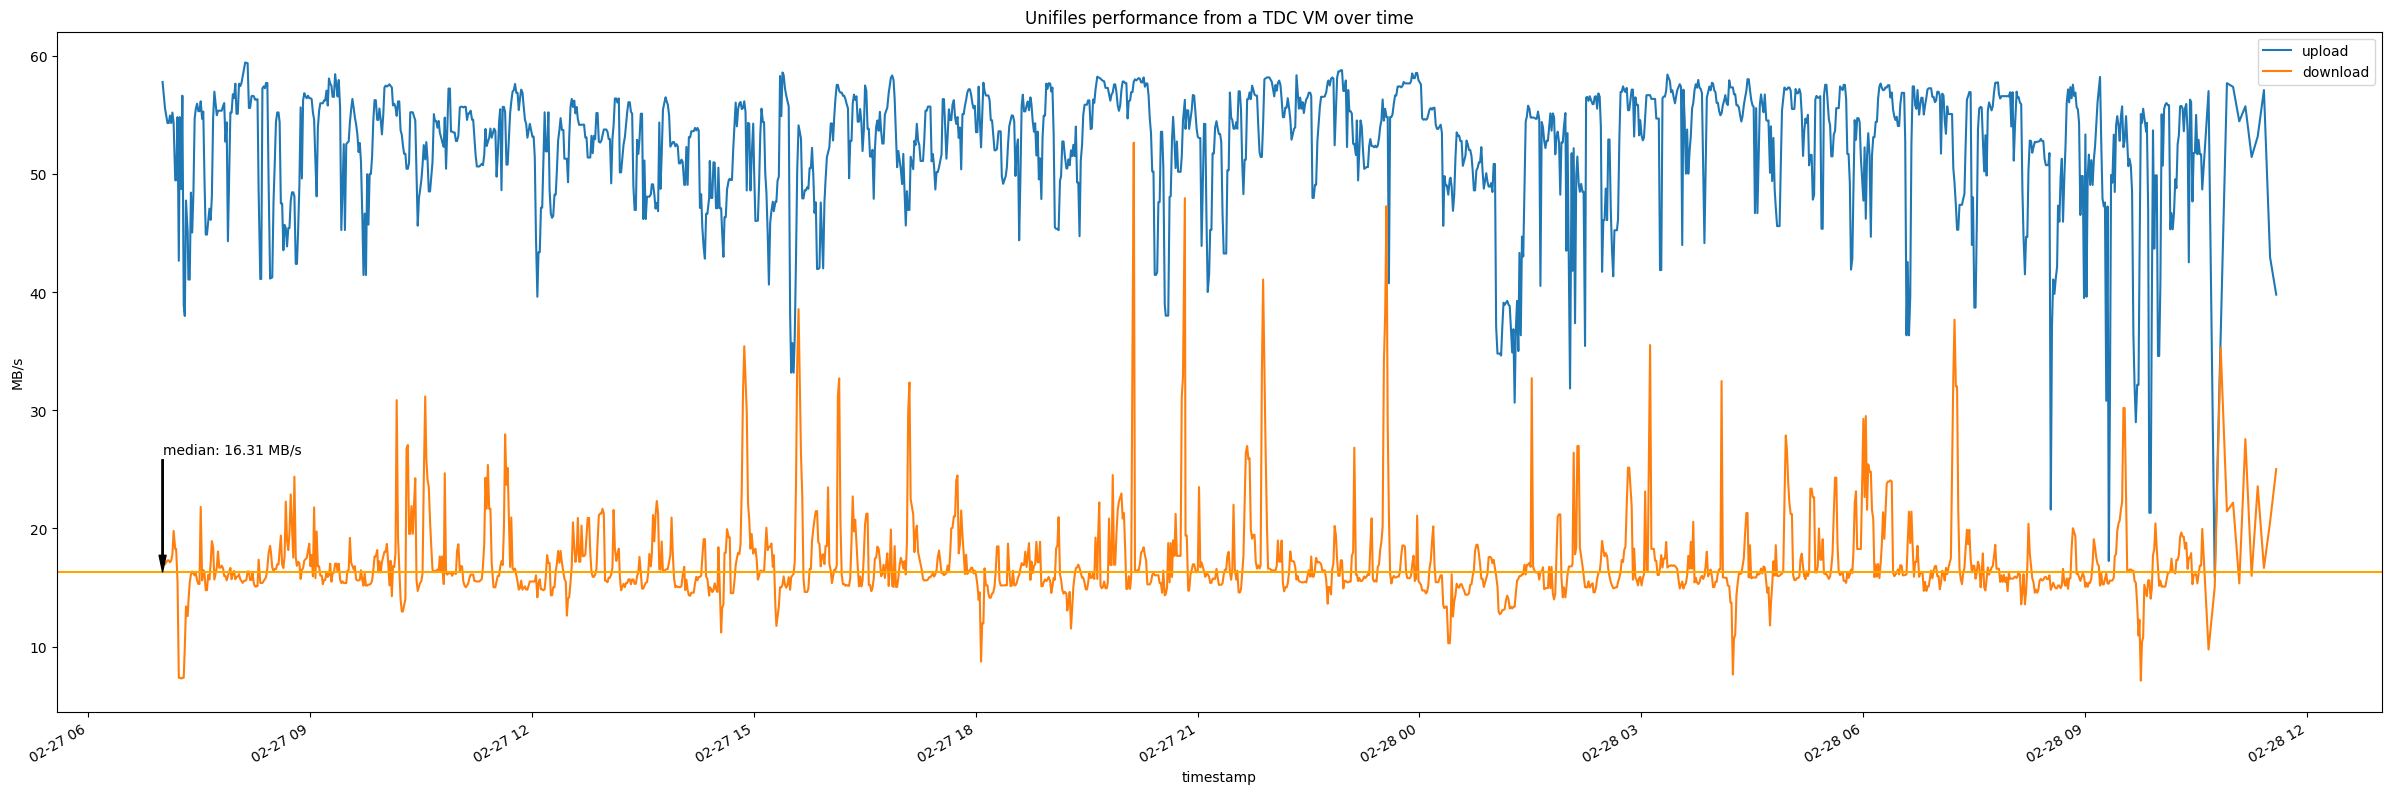

In [3]:
ax = df.rolling(window=pd.Timedelta("5m")).median().plot(figsize=(30, 10), ylabel="MB/s", style="-", title="Unifiles performance from a TDC VM over time")
median = df.download.median()
ax.axhline(y=median, color="orange")
ax.annotate(f"median: {median:.2f} MB/s", xy=(df.index[0], median), xytext=(df.index[0], median + 10), arrowprops=dict(facecolor='black', width=1, headwidth=5))